## Coverage Pay EDA

EDA of coverage pay data for two quarters, Q1, August 17, 2023 to October 20, 2023, and Q2, October 21, 2023 to January 19, 2024.

In [2]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [4]:
#importing Q1 and Q2 Coverage Pay data
Q1 = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - SQL Coverage Pay Dataset - Q1.csv", parse_dates = ['Date', 'Date of Coverage'] )

Q2 = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - Coverage Compensation - Q2.csv", parse_dates = ['Date','Date of Coverage'])

#Dropping columns 
Q1 = Q1.drop(columns = ['Email Address', 'Supervisor','Coverage Approval','Approved/Unapproved'])

Q2 = Q2.drop(columns = ['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 
                        'Reference', 'Approved/Unapproved', 'Coverage Approval',
                        'Supervisor', 'Email Address'])
#concating dataframes
half = pd.concat([Q1,Q2])

In [38]:
#Type of Coverage Data Cleaning
half['Type of Coverage'] = half['Type of Coverage'].replace('Class coverage (long term)','Long Term') 
half['Type of Coverage'] = half['Type of Coverage'].replace('Class coverage (short term)','Short Term')
half['Type of Coverage'] = half['Type of Coverage'].replace('After School Program (Tutoring)','After School Program Tutoring')
half['Type of Coverage'] = half['Type of Coverage'].replace('Non instructional','Non Instructional')

In [8]:
half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1193
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1779 non-null   datetime64[ns]
 1   Name                 1779 non-null   object        
 2   Employee No          1779 non-null   int64         
 3   Date of Coverage     1779 non-null   datetime64[ns]
 4   Type of Coverage     1779 non-null   object        
 5   Campus               1779 non-null   object        
 6   Number of Coverages  1779 non-null   int64         
 7   Total Compensation   1779 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 125.1+ KB


In [23]:
#defining variable for cutoff date in function
cutoff_date = pd.to_datetime('2023-10-21')

#Creating Quarter column
def quarter(x):
    if x < cutoff_date:
        return 'Q1'
    
    else:
        return 'Q2'
        
half['Quarter'] = half['Date of Coverage'].apply(lambda x: quarter(x))

In [27]:
# Q1 Date Range Validation
Q1 = half[half['Quarter'] == 'Q1']
Q1['Date of Coverage'].agg(['min', 'max'])

min   2023-08-17
max   2023-10-20
Name: Date of Coverage, dtype: datetime64[ns]

In [26]:
#Q2 Date Range Validation
Q2 = half[half['Quarter'] == 'Q2']
Q2['Date of Coverage'].agg(['min', 'max'])

min   2023-10-23
max   2024-01-18
Name: Date of Coverage, dtype: datetime64[ns]

In [9]:
half.shape

(1779, 8)

In [12]:
half[half.duplicated()]

,Date,Name,Employee No,Date of Coverage,Type of Coverage,Campus,Number of Coverages,Total Compensation


No duplicates

In [73]:
#Data Cleaning
half['Name'] = half['Name'].str.title()

#Statistical Metrics
round(half.groupby('Name')['Total Compensation'].sum().describe(),2)

count      95.00
mean     1197.25
std      1657.15
min        25.00
25%       142.50
50%       429.59
75%      1387.50
max      7530.00
Name: Total Compensation, dtype: float64

<Axes: title={'center': 'Coverage Pay Compensation Box Plot'}>

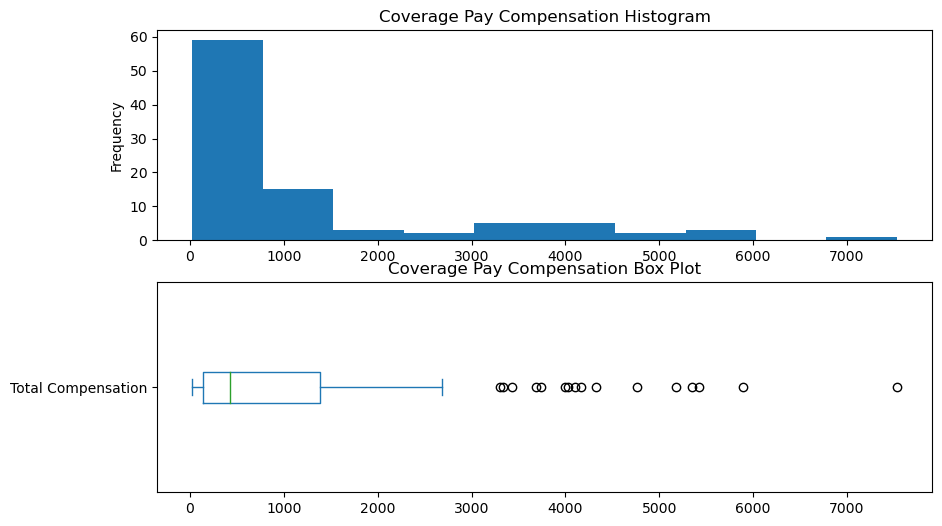

In [192]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,6))

half.groupby('Name')['Total Compensation'].sum().plot(kind = 'hist', ax = ax[0], title  = 'Coverage Pay Compensation Histogram')
half.groupby('Name')['Total Compensation'].sum().plot(kind = 'box', vert = False, ax = ax[1], title = 'Coverage Pay Compensation Box Plot')

There is a right skew in the data as majority of the total compensation is below 2,000 USD. However, there are outliers in the data increasing the mean of the dataset.

In [29]:
round(half['Total Compensation'].sum(),2)

113739.08

In Q1 and Q2 the total amount paid to staff for coverage pay was 113,739.08 USD

In [87]:
#Outliers
Q3 = 1387.50
Q1 = 142.50
IQR = Q3 - Q1

Outliers_Upper = Q3 + (IQR * 1.5)
Outliers_Upper

3255.0

Employees that have recieved greater than or equal to 3,255.00 USD are outliers.

In [99]:
#Finding Outlier values
Total_Emp_Comp = half.groupby('Name')['Total Compensation'].sum().reset_index().sort_values(by = 'Total Compensation', ascending = False)
Total_Emp_Comp[Total_Emp_Comp['Total Compensation'] > Outliers_Upper ].shape[0]

16

In [343]:
#Outlier Employee List
Total_Emp_Comp[Total_Emp_Comp['Total Compensation'] > Outliers_Upper ]

,Name,Total Compensation
27,Danae Williams,7530.00
64,Margarita Medina,5896.22
25,Courtney Agyeman,5421.87
28,Daneena Dixon,5348.34
86,Summiya Abdul-Quddus,5180.00
32,Denise Bembry,4765.00
49,Jessica Yentema,4330.00
11,Bridget Lewis,4160.00
1,Alice Lubrano,4102.28
15,Calvin Mcrae,4022.21


There are 16 outliers in the dataset. With the highest compensation total being 7,530.00 USD.

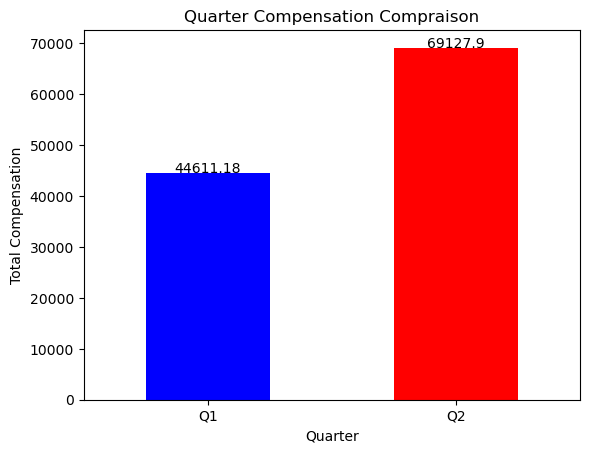

In [294]:
Quarter_Total = half.groupby('Quarter')['Total Compensation'].sum().reset_index()
Quarter_Total = Quarter_Total.set_index('Quarter')
Quarter_Total['Diff'] = Quarter_Total['Total Compensation'].diff().fillna(0)
Quarter_Total['Pct Change'] = round(Quarter_Total['Total Compensation'].pct_change().fillna(0),2)

colors = ['blue', 'red']
Quarter_Total['Total Compensation'].plot(kind = 'bar', rot = 0, title = 'Quarter Compensation Compraison', ylabel = 'Total Compensation', color = colors)

for index, value in enumerate (Quarter_Total['Total Compensation']):
    plt.text(index,value, str(value), ha = 'center')

plt.show()

In Quarter 2 there was a 24,516.72 USD, approximately a 55 percent, increase in coverage pay.

In [147]:
Quarter_Total

,Total Compensation,Diff,Pct Change
Quarter,,,
Q1,44611.18,0.00,0.00
Q2,69127.90,24516.72,0.55


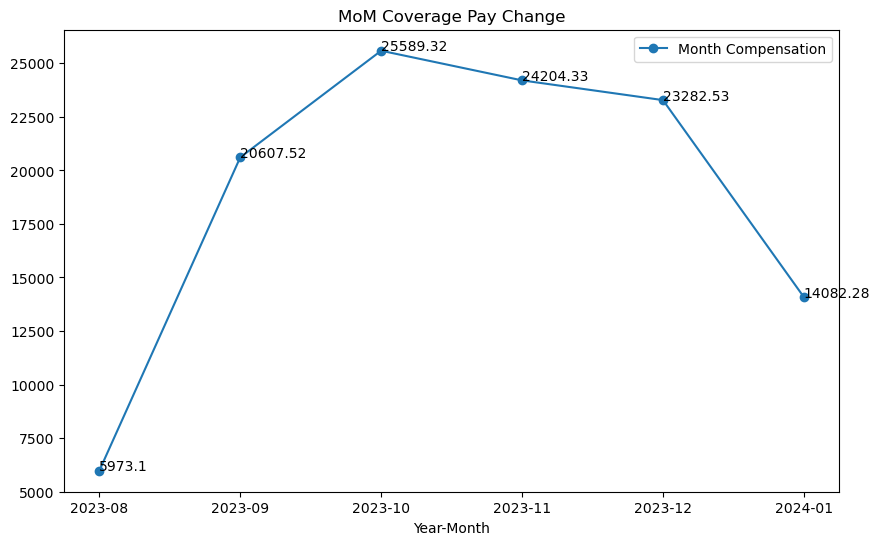

In [297]:
#MoM Change
half['Year-Month'] = half['Date of Coverage'].dt.strftime('%Y-%m')

#Aggregating
MoM = half.groupby('Year-Month')['Total Compensation'].sum().reset_index()

#Renaming Columns
MoM.rename(columns = {'Total Compensation':'Month Compensation'}, inplace = True)

#MoM Metrics
MoM['Diff'] = round(MoM['Month Compensation'].diff(),2).fillna(0)
MoM['Pct_Change'] = round(MoM['Month Compensation'].pct_change(),2).fillna(0)


#Plotting Data
MoM.plot(x = 'Year-Month', y = 'Month Compensation', marker = 'o', figsize = (10,6), title = 'MoM Coverage Pay Change')

for index,value in enumerate(MoM['Month Compensation']):
    plt.text(index,value,str(value))

In [296]:
MoM

,Year-Month,Month Compensation,Diff,Pct_Change
0,2023-08,5973.10,0.00,0.00
1,2023-09,20607.52,14634.42,2.45
2,2023-10,25589.32,4981.80,0.24
3,2023-11,24204.33,-1384.99,-0.05
4,2023-12,23282.53,-921.80,-0.04
5,2024-01,14082.28,-9200.25,-0.40


In [345]:
round(MoM[['Diff','Pct_Change']].mean(),2)

Diff          1351.53
Pct_Change       0.37
dtype: float64

On average, there was an increase if 1,351.53 USD (37%) MoM. The month with the largest increase in coverage pay data was September 2023, an increase of 14,634.42 USD (245%). The month with the largest decrease in coverage pay was January 2024, -9,200.25 USD (-40%).October 2023 was the month the largest coverage pay total thus far, 25,589.32 USD, and August was the month with the least amount of coverage pay.

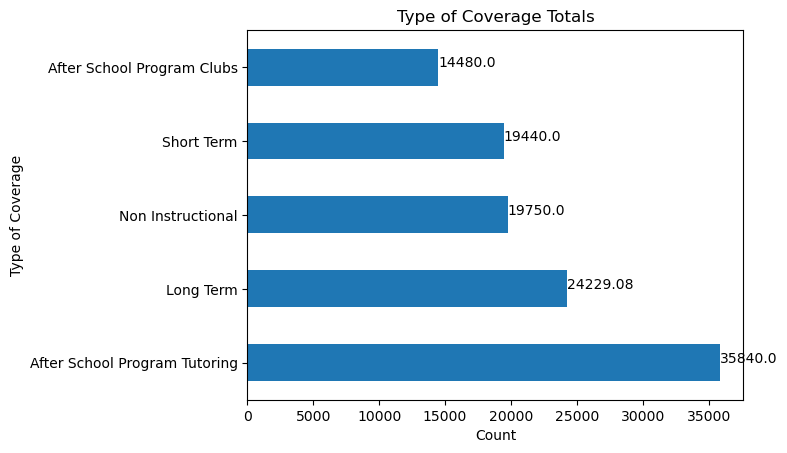

In [50]:
#Plotting Data
Coverage_Type_Totals = half.groupby('Type of Coverage')['Total Compensation'].sum ().sort_values(ascending = False)
Coverage_Type_Totals.plot(kind = 'barh', title = 'Type of Coverage Totals',xlabel = 'Count')

#Labeling
for index,value in enumerate (Coverage_Type_Totals):
    plt.text(value, index, str(value))
    
#Displaying Data
plt.show()


In [356]:
total_coverages = half['Number of Coverages'].sum()

round(half.groupby('Type of Coverage')['Number of Coverages'].sum()/total_coverages,2)

Type of Coverage
After School Program Clubs       0.07
After School Program Tutoring    0.17
Long Term                        0.23
Non Instructional                0.29
Short Term                       0.24
Name: Number of Coverages, dtype: float64

After School Program tutoring was the coverage type with the largest coverage pay total despite only accounting for 17% of submitted coverages by staff. 

In [239]:
#Calculating coverage Type by quarter
Quarter_Type = half.groupby(['Quarter','Type of Coverage'])['Total Compensation'].sum().reset_index()

### After School Program Clubs

In [266]:
colors = ['blue', 'red']
After_School_Clubs_Comp = Quarter_Type[Quarter_Type['Type of Coverage'] == 'After School Program Clubs']
After_School_Clubs_Comp['Diff'] = After_School_Clubs_Comp['Total Compensation'].diff().fillna(0)
After_School_Clubs_Comp['Pct_change'] = round(After_School_Clubs_Comp['Total Compensation'].pct_change(),2).fillna(0)

After_School_Clubs_Comp

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\1624584650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  After_School_Clubs_Comp['Diff'] = After_School_Clubs_Comp['Total Compensation'].diff().fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\1624584650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  After_School_Clubs_Comp['Pct_change'] = round(After_School_Clubs_Comp['Total Compensation'].pct_change(),2).fillna(0)


,Quarter,Type of Coverage,Total Compensation,Diff,Pct_change
0,Q1,After School Program Clubs,240.0,0.0,0.00
5,Q2,After School Program Clubs,14240.0,14000.0,58.33


### After School Program Tutoring

In [191]:
After_School_Tutoring_Comp = Quarter_Type[Quarter_Type['Type of Coverage'] == 'After School Program Tutoring']
After_School_Tutoring_Comp['Diff'] = After_School_Tutoring_Comp['Total Compensation'].diff().fillna(0)
After_School_Tutoring_Comp['Pct Change'] = round(After_School_Tutoring_Comp['Total Compensation'].pct_change().fillna(0),2)
After_School_Tutoring_Comp

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2191546105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  After_School_Tutoring_Comp['Diff'] = After_School_Tutoring_Comp['Total Compensation'].diff().fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2191546105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  After_School_Tutoring_Comp['Pct Change'] = round(After_School_Tutoring_Comp['Total Compensation'].pct_change().fillna(0),2)


,Quarter,Type of Coverage,Total Compensation,Diff,Pct Change
1,Q1,After School Program Tutoring,16320.0,0.0,0.0
6,Q2,After School Program Tutoring,19520.0,3200.0,0.2


### Long Term

In [230]:
Long_Term_Comp = Quarter_Type[Quarter_Type['Type of Coverage'] == 'Long Term']
Long_Term_Comp['Diff'] = round(Long_Term_Comp['Total Compensation'].diff(),2).fillna(0)
Long_Term_Comp['Pct_change'] = round(Long_Term_Comp['Total Compensation'].pct_change(),2).fillna(0)

Long_Term_Comp

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2546675218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Long_Term_Comp['Diff'] = round(Long_Term_Comp['Total Compensation'].diff(),2).fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2546675218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Long_Term_Comp['Pct_change'] = round(Long_Term_Comp['Total Compensation'].pct_change(),2).fillna(0)


,Quarter,Type of Coverage,Total Compensation,Diff,Pct_change
2,Q1,Long Term,11956.18,0.00,0.00
7,Q2,Long Term,12272.90,316.72,0.03


### Non Instructional

In [238]:
Non_Ins_Term_Comp = Quarter_Type[Quarter_Type['Type of Coverage'] == 'Non Instructional']
Non_Ins_Term_Comp['Diff'] = Non_Ins_Term_Comp['Total Compensation'].diff().fillna(0)
Non_Ins_Term_Comp['Pct_Change'] = round(Non_Ins_Term_Comp['Total Compensation'].pct_change().fillna(0),2)
Non_Ins_Term_Comp

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\292333405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_Ins_Term_Comp['Diff'] = Non_Ins_Term_Comp['Total Compensation'].diff().fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\292333405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_Ins_Term_Comp['Pct_Change'] = round(Non_Ins_Term_Comp['Total Compensation'].pct_change().fillna(0),2)


,Quarter,Type of Coverage,Total Compensation,Diff,Pct_Change
3,Q1,Non Instructional,7875.0,0.0,0.00
8,Q2,Non Instructional,11875.0,4000.0,0.51


### Short Term

In [233]:
Short_Term_Comp = Quarter_Type[Quarter_Type['Type of Coverage'] == 'Short Term']
Short_Term_Comp['Diff'] = round(Short_Term_Comp['Total Compensation'].diff(),2).fillna(0)
Short_Term_Comp['Pct_change'] = round(Short_Term_Comp['Total Compensation'].pct_change(),2).fillna(0)
Short_Term_Comp

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2676047429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Short_Term_Comp['Diff'] = round(Short_Term_Comp['Total Compensation'].diff(),2).fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\2676047429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Short_Term_Comp['Pct_change'] = round(Short_Term_Comp['Total Compensation'].pct_change(),2).fillna(0)


,Quarter,Type of Coverage,Total Compensation,Diff,Pct_change
4,Q1,Short Term,8220.0,0.0,0.00
9,Q2,Short Term,11220.0,3000.0,0.36


<Axes: title={'center': 'Quarter Coverage Type Total Comparison'}, xlabel='Quarter'>

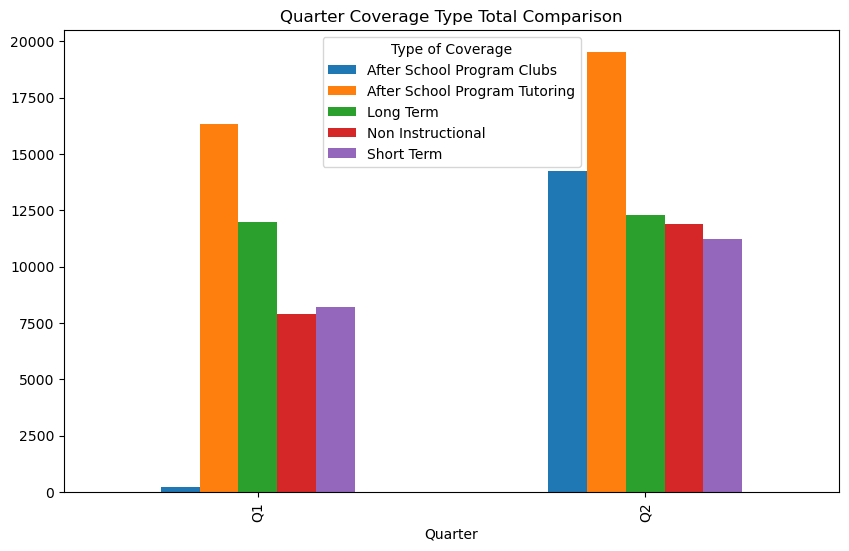

In [279]:
Quarter_Comparison = half.groupby(['Quarter','Type of Coverage'])['Total Compensation'].sum().unstack()
Quarter_Comparison.plot(kind = 'bar', figsize = (10,6), title = 'Quarter Coverage Type Total Comparison')

After School Program Clubs had the largest increase quarter over quarter, a difference of more than 14,000 USD (~58%).There was also a 4,000 USD increase in Non Instructional coverages quarter over quarter, approximately  a 51% increase.

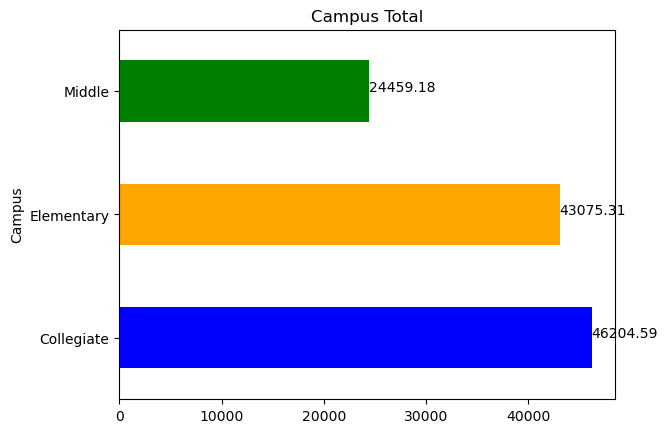

In [342]:
colors = ['blue','orange','green']

#Aggregating Data
Campus_Total = round(half.groupby('Campus')['Total Compensation'].sum(),2).reset_index()
Campus_Total.rename(columns = {'Total Compensation':'Campus Total'}, inplace =True)

#Plotting Data
Campus_Total.plot(x = 'Campus', y = 'Campus Total', kind = 'barh', title = 'Campus Total', color = colors)

for index,value in enumerate(Campus_Total['Campus Total']):
    plt.text(value,index,str(value))

    
plt.legend().remove()
plt.show()


The Collegiate Campus has the largest coverage pay total, 46,204.59 USD.

In [307]:
Campus_Metrics = half.groupby(['Quarter','Campus'])['Total Compensation'].sum().reset_index()
Campus_Metrics.rename(columns = {'Total Compensation':'Campus Compensation'}, inplace = True)

In [310]:
Collegiate_Metrics = Campus_Metrics[Campus_Metrics['Campus'] == 'Collegiate' ]
Collegiate_Metrics['Diff']= round(Collegiate_Metrics['Campus Compensation'].diff(),2).fillna(0)
Collegiate_Metrics['Pct_Change']= round(Collegiate_Metrics['Campus Compensation'].pct_change(),2).fillna(0)

Collegiate_Metrics

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\363040524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Collegiate_Metrics['Diff']= round(Collegiate_Metrics['Campus Compensation'].diff(),2).fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\363040524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Collegiate_Metrics['Pct_Change']= round(Collegiate_Metrics['Campus Compensation'].pct_change(),2).fillna(0)


,Quarter,Campus,Campus Compensation,Diff,Pct_Change
0,Q1,Collegiate,12341.36,0.00,0.00
3,Q2,Collegiate,33863.23,21521.87,1.74


In [313]:
Middle_Metrics = Campus_Metrics[Campus_Metrics['Campus'] == 'Middle' ]
Middle_Metrics['Diff']= round(Middle_Metrics['Campus Compensation'].diff(),2).fillna(0)
Middle_Metrics['Pct_Change']= round(Middle_Metrics['Campus Compensation'].pct_change(),2).fillna(0)

Middle_Metrics

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\68212430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Middle_Metrics['Diff']= round(Middle_Metrics['Campus Compensation'].diff(),2).fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\68212430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Middle_Metrics['Pct_Change']= round(Middle_Metrics['Campus Compensation'].pct_change(),2).fillna(0)


,Quarter,Campus,Campus Compensation,Diff,Pct_Change
2,Q1,Middle,10039.59,0.0,0.00
5,Q2,Middle,14419.59,4380.0,0.44


In [314]:
Elementary_Metrics = Campus_Metrics[Campus_Metrics['Campus'] == 'Elementary' ]
Elementary_Metrics['Diff']= round(Elementary_Metrics['Campus Compensation'].diff(),2).fillna(0)
Elementary_Metrics['Pct_Change']= round(Elementary_Metrics['Campus Compensation'].pct_change(),2).fillna(0)

Elementary_Metrics

C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\1966577741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elementary_Metrics['Diff']= round(Elementary_Metrics['Campus Compensation'].diff(),2).fillna(0)
C:\Users\togarro\AppData\Local\Temp\ipykernel_20012\1966577741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elementary_Metrics['Pct_Change']= round(Elementary_Metrics['Campus Compensation'].pct_change(),2).fillna(0)


,Quarter,Campus,Campus Compensation,Diff,Pct_Change
1,Q1,Elementary,22230.23,0.00,0.00
4,Q2,Elementary,20845.08,-1385.15,-0.06


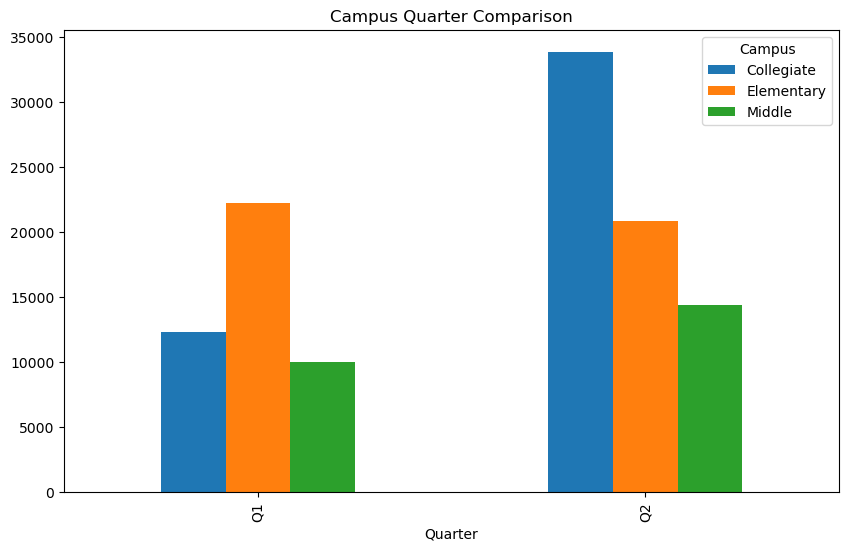

In [318]:
Campus_Camparison =  half.groupby(['Quarter','Campus'])['Total Compensation'].sum().unstack()
Campus_Camparison.plot(kind = 'bar', title = 'Campus Quarter Comparison', figsize = (10,6))

plt.show()

The Collegiate Campus had the largest increase in coverage pay quarter over quarter, 21,521.87 USD (174%). Courtney Ageyman is the employee at the Collegiate Campus was the highest combined coverage pay total, 5421.87 USD.

In [362]:
half[half['Campus']== 'Collegiate'].groupby(['Campus','Name'])['Total Compensation'].sum().sort_values(ascending = False).head(1)

Campus      Name            
Collegiate  Courtney Agyeman    5421.87
Name: Total Compensation, dtype: float64

In [371]:
#Creating Dataframe with remaining salary totals

data = [['Teachers ES',564100.03,43075.31], ['Teachers MS',408164.69,24459.18], ['Teachers Collegiate',147983.13,46204.59]]

Budget_Remaining = pd.DataFrame(data, columns = ['Account Title', 'Budget Remaining', 'Coverage Pay Total'])

Budget_Remaining['Difference'] = round(Budget_Remaining['Budget Remaining'] - Budget_Remaining['Coverage Pay Total'],2)

Budget_Remaining

,Account Title,Budget Remaining,Coverage Pay Total,Difference
0,Teachers ES,564100.03,43075.31,521024.72
1,Teachers MS,408164.69,24459.18,383705.51
2,Teachers Collegiate,147983.13,46204.59,101778.54


The Budget Remaining values are accurate as of December 31, 2023. The Collegaite Campus has the least amount of money remaining in their budget, 101,778.54 USD.